<a href="https://colab.research.google.com/github/1830668NabilahOshin/Numerical-methods-and-Neural-Network-Labwork/blob/main/TF_IDF-by%20Oshin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

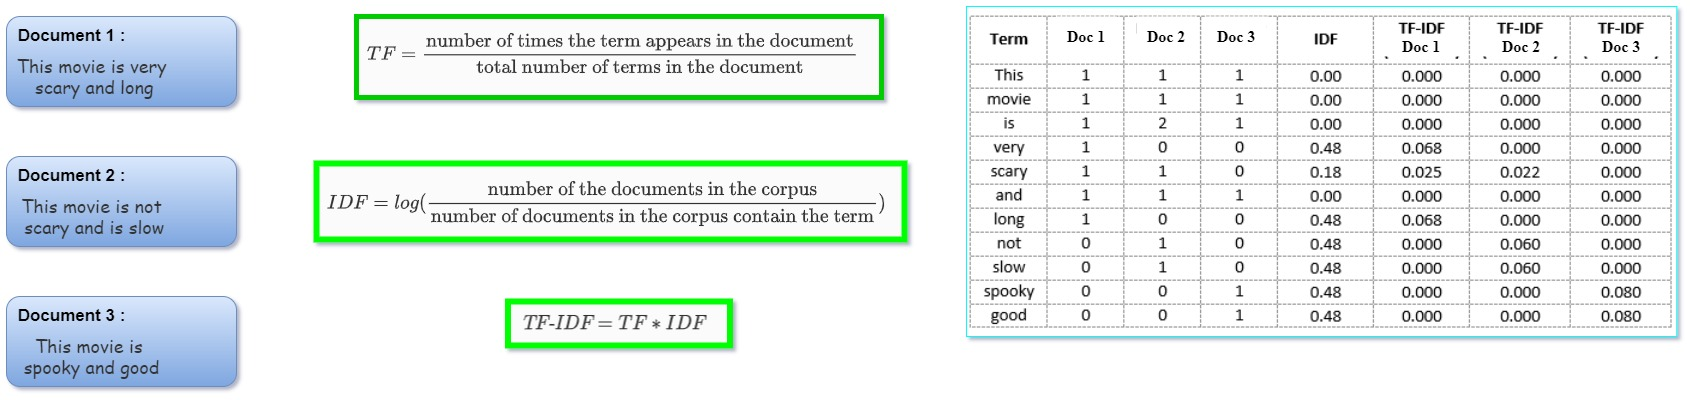

#TF-IDF

TF-IDF (term frequency-inverse document frequency) is an algorithm to measure how relevant and important a word is to a document in a collection of documents or a corpus. as this model contains information on the more important words and the less important ones, it works better than the BOW model

#What is TF?

Term frequency works by looking at the frequency of a particular term you are concerned with relative to the document.

We have to measure the Number of times the word appears in a document (raw count).Term frequency adjusted for the length of the document (raw count of occurences divided by number of words in the document).



#What is IDF?
Inverse document frequency looks at how common (or uncommon) a word is amongst the documents. This means, how common or rare a word is in the entire document set. The closer it is to 0, the more common a word is. This can be calculated by taking the total number of documents, dividing it by the number of documents that contain a word, and calculating the logarithm.

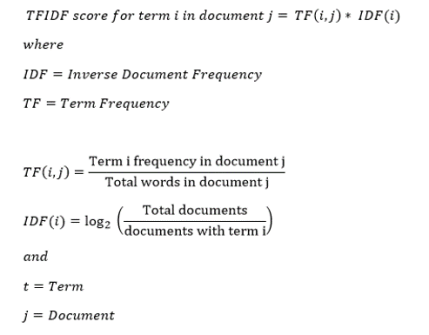

#Impementation of TF-IDF

Let's take 3 sentences as 3 documents and apply TF-IDF method. Imagine a group of friends watching a horror movie together and they express their reviews about the movie to each other. One of them says "This movie is very scary and long", another one says "This movie is not scary and is slow" and the other friend says "This movie is spooky and good"
Now it is time to covert their opinions into vectors.

#Calculating TF for each words present in every document

In [ ]:
import pandas as pd
import numpy as np

corpus = ['This movie is very scary and long',
          'This movie is not scary and is slow',
          'This movie is spooky and good' ]

words_set = set()                #creating a dictionary

for doc in  corpus:
    words = doc.split(' ')
    words_set = words_set.union(set(words))

print('Number of words in the corpus:',len(words_set))
print('The words in the corpus: \n', words_set)


n_docs = len(corpus)         #·Number of documents in the corpus
n_words_set = len(words_set) #·Number of unique words in the

df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=words_set)

# Compute Term Frequency (TF)
for i in range(n_docs):
    words = corpus[i].split(' ') # Words in the document
    for w in words:
        df_tf[w][i] = df_tf[w][i] + (1 / len(words))

print("Calculated TF :")
df_tf


Number of words in the corpus: 11
The words in the corpus: 
 {'very', 'movie', 'is', 'not', 'slow', 'good', 'long', 'This', 'and', 'scary', 'spooky'}
Calculated TF :


,very,movie,is,not,slow,good,long,This,and,scary,spooky
0,0.142857,0.142857,0.142857,0.000,0.000,0.000000,0.142857,0.142857,0.142857,0.142857,0.000000
1,0.000000,0.125000,0.250000,0.125,0.125,0.000000,0.000000,0.125000,0.125000,0.125000,0.000000
2,0.000000,0.166667,0.166667,0.000,0.000,0.166667,0.000000,0.166667,0.166667,0.000000,0.166667


#Calculating IDF for each words present in all documents

In [ ]:
print("Calculated IDF ")

idf = {}

for w in words_set:
    k = 0    # number of documents in the corpus that contain this word

    for i in range(n_docs):
        if w in corpus[i].split():
            k += 1

    idf[w] =  np.log10(n_docs / k)

    print(f'{w:>15}: {idf[w]:>10}' )


Calculated IDF 
           very: 0.47712125471966244
          movie:        0.0
             is:        0.0
            not: 0.47712125471966244
           slow: 0.47712125471966244
           good: 0.47712125471966244
           long: 0.47712125471966244
           This:        0.0
            and:        0.0
          scary: 0.17609125905568124
         spooky: 0.47712125471966244


#Calculating TFxIDF

In [ ]:
df_tf_idf = df_tf.copy()

for w in words_set:
    for i in range(n_docs):
        df_tf_idf[w][i] = df_tf[w][i] * idf[w]

df_tf_idf

,very,movie,is,not,slow,good,long,This,and,scary,spooky
0,0.06816,0.0,0.0,0.00000,0.00000,0.00000,0.06816,0.0,0.0,0.025156,0.00000
1,0.00000,0.0,0.0,0.05964,0.05964,0.00000,0.00000,0.0,0.0,0.022011,0.00000
2,0.00000,0.0,0.0,0.00000,0.00000,0.07952,0.00000,0.0,0.0,0.000000,0.07952
